In [37]:
import numpy as np
import pandas as pd


In [38]:
df = pd.read_csv("placement.csv")

In [39]:
df.head()

Unnamed: 0  cgpa   iq  placement
0           0   6.8  123          1
1           1   5.9  106          0
2           2   5.3  121          0
3           3   7.4  132          1
4           4   5.8  142          0

In [40]:
df.shape

(100, 4)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [42]:
df = df.iloc[:, 1:]

In [43]:
df.head()

cgpa   iq  placement
0   6.8  123          1
1   5.9  106          0
2   5.3  121          0
3   7.4  132          1
4   5.8  142          0

In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [45]:
import matplotlib.pyplot as plt

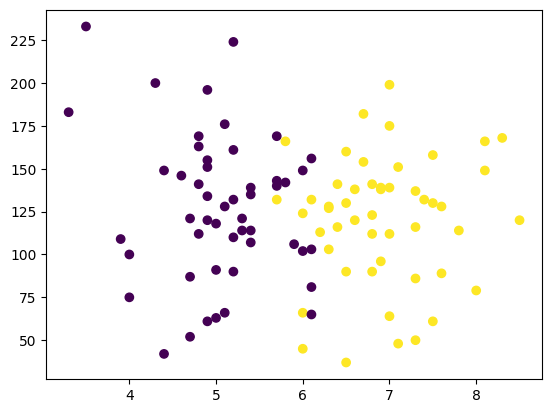

In [46]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])

In [47]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [48]:
X

cgpa   iq
0    6.8  123
1    5.9  106
2    5.3  121
3    7.4  132
4    5.8  142
..   ...  ...
95   4.3  200
96   4.4   42
97   6.7  182
98   6.3  103
99   6.2  113

[100 rows x 2 columns]

In [49]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [50]:
y.shape

(100,)

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [52]:
X_train

cgpa   iq
55   7.8  114
88   4.4  149
26   7.0  199
42   7.6   89
69   8.5  120
..   ...  ...
60   6.9  139
71   6.1  132
14   6.1  103
92   5.2  110
51   4.8  141

[80 rows x 2 columns]

In [53]:
y_train

55    1
88    0
26    1
42    1
69    1
     ..
60    1
71    1
14    0
92    0
51    0
Name: placement, Length: 80, dtype: int64

In [54]:
X_test

cgpa   iq
83   7.5  130
53   8.3  168
70   6.3  127
45   6.0   66
44   7.5   61
39   4.6  146
22   4.9  120
80   4.9  196
10   6.0   45
0    6.8  123
18   4.0  100
30   7.6  128
73   4.9   61
33   6.0  149
90   7.3   86
4    5.8  142
76   4.9  155
77   7.3   50
12   5.4  139
31   3.9  109

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
X_train

array([[ 1.64027754, -0.29911792],
       [-1.44090679,  0.59472432],
       [ 0.91529299,  1.87164179],
       [ 1.4590314 , -0.93757666],
       [ 2.27463902, -0.14588782],
       [-0.80654531,  1.28425975],
       [-0.98779145,  0.21164907],
       [-1.44090679, -2.13787909],
       [-0.80654531, -1.5249587 ],
       [ 1.1871622 , -0.24804122],
       [ 0.82466992,  0.31380247],
       [-0.71592224,  0.90118451],
       [-0.17218383,  1.02887626],
       [-0.71592224, -0.91203831],
       [ 0.73404686, -0.35019462],
       [ 1.00591606, -1.98464899],
       [ 0.82466992, -0.75880821],
       [ 1.91214675,  1.02887626],
       [ 0.73404686, -0.91203831],
       [-0.71592224,  2.51010053],
       [-0.5346761 ,  0.23718742],
       [-1.07841452,  0.95226121],
       [-0.89716838, -1.60157375],
       [-1.53152986,  1.89718014],
       [ 0.00906231, -0.04373442],
       [-0.71592224,  0.16057237],
       [-0.5346761 , -0.47788637],
       [-0.89716838, -0.88649996],
       [ 0.00906231,

In [59]:
X_test = scaler.transform(X_test)

In [60]:
X_test

array([[ 1.36840833,  0.10949567],
       [ 2.09339288,  1.07995296],
       [ 0.28093151,  0.03288063],
       [ 0.00906231, -1.5249587 ],
       [ 1.36840833, -1.65265045],
       [-1.25966065,  0.51810927],
       [-0.98779145, -0.14588782],
       [-0.98779145,  1.79502675],
       [ 0.00906231, -2.06126404],
       [ 0.73404686, -0.06927277],
       [-1.80339906, -0.65665481],
       [ 1.4590314 ,  0.05841897],
       [-0.98779145, -1.65265045],
       [ 0.00906231,  0.59472432],
       [ 1.1871622 , -1.01419171],
       [-0.17218383,  0.41595587],
       [-0.98779145,  0.74795441],
       [ 1.1871622 , -1.93357229],
       [-0.5346761 ,  0.33934082],
       [-1.89402213, -0.42680967]])

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
clf = LogisticRegression()

In [63]:
clf.fit(X_train,y_train)

LogisticRegression()

In [64]:
y_pred =clf.predict(X_test)

In [65]:
y_test

83    1
53    1
70    1
45    1
44    1
39    0
22    0
80    0
10    1
0     1
18    0
30    1
73    0
33    0
90    1
4     0
76    0
77    1
12    0
31    0
Name: placement, dtype: int64

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
a=accuracy_score(y_test,y_pred)

In [68]:
print(a)

0.85


In [69]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

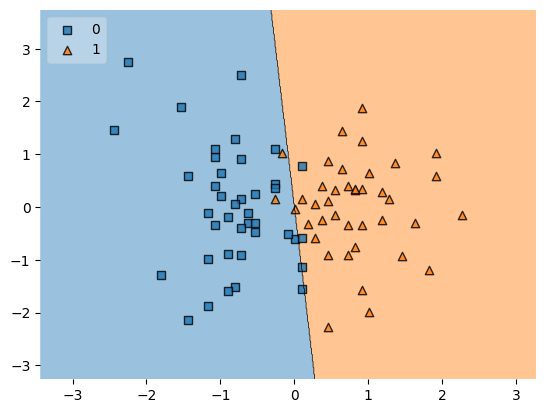

In [70]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [71]:
import pickle

In [72]:
pickle.dump(clf,open('model.pkl','wb'))